In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [44]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.3&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.4&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.5&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.6&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.7&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.9&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=1.0&num_states=1&num_tasks=15&period=[50, 100]&task_ma

In [55]:
cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [56]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [57]:
print(orig)
print(wo_drop)
print(ours)

[7.566666666666666, 7.613333333333333, 7.633333333333334, 7.473333333333334, 7.54, 7.433333333333334, 7.573333333333333, 7.613333333333333, 7.546666666666667, 7.48, 7.68]
[3.933333333333333, 6.38, 7.633333333333334, 8.24, 8.646666666666667, 8.846666666666666, 9.046666666666667, 9.54, 9.54, 9.26, 7.68]
[3.933333333333333, 4.086666666666667, 4.086666666666667, 4.213333333333333, 4.273333333333333, 4.553333333333334, 4.873333333333333, 5.54, 6.1, 6.713333333333333, 7.68]


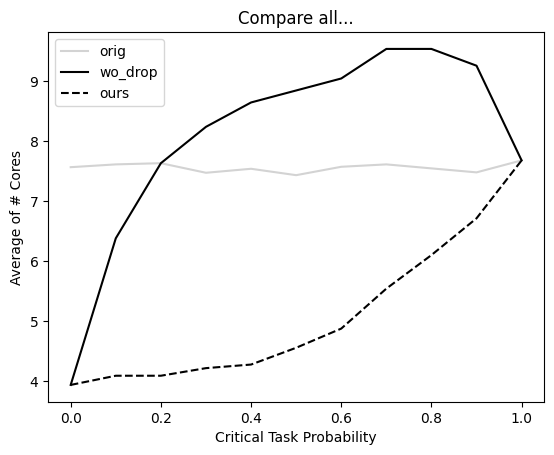

In [58]:
plt.plot(criticality_prob_list, orig, label='orig', color='lightgray')
plt.plot(criticality_prob_list, wo_drop, label='wo_drop', color='black')
plt.plot(criticality_prob_list, ours, label='ours', color='black', linestyle='dashed')

plt.title('Compare all...')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()